# Devang Patel 

# Practical Exam (CSC 4780/6780) -- April 25th, 2020 (10:00 AM- 5:00 PM)
## Submit your answers to iCollege. Do not email. Multiple submissions are allowed.

_This is an open book exam. During the exam, you are allowed to use course materials (notes, slides, sample codes, homework assignments) or external resources (such as library documentation or example code pieces). However, you must not get help from any individual, including your peers in this class._


By submitting your answers, you certify that the answers is your own work, based on your personal study and research, and that you have not copied in part or whole or otherwise plagiarised the work of other students and/or persons. You also certify that you have read and understood the class policies and consequences of academic dishonesty as explained in the class website (https://grid.cs.gsu.edu/~baydin2/courses/csc4780/index.html and references/links therein)

## Dataset and Background
Food spectrographs are used in chemometrics to classify food types, a task that has obvious applications in food safety and quality assurance. You are given a time series dataset obtained after spectral analysis of fresh fruit purees [(Holland et al. 1999)](https://doi.org/10.1002/(SICI)1097-0010(199802)76:2%3C263::AID-JSFA943%3E3.0.CO;2-F). The classes are strawberry (authentic samples) and non-strawberry (adulterated strawberries and other fruits) [encoded as `S1` and `S2`]. The dataset contains 983 time series instances. Each timseries has a length of 235. Note here that time series are stored in the rows. The data can be read from `Strawberry_TS.csv` (therefore, place it in the same directory as this starter code). In this practical exam, you will explore this data and build predictive models. Note here that while the specifics and details of data is given for completeness, they are not relevant for the exam.

The values of time series are represented in the cells corresponding to columns $\{t0, t1, ... t234\}$.
The `index` is the identifier of the instances. The `Class` column shows the class of time series and is your target variable. 


In [13]:
# run the below code to load time series dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
ts_df = pd.read_csv('Strawberry_TS.csv', index_col=0)
ts_df_c = ts_df.copy()

# ts_df
ts_df.info()
ts_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, ins0 to ins982
Columns: 236 entries, Class to t234
dtypes: float64(235), object(1)
memory usage: 1.8+ MB


Class        t0        t1        t2        t3        t4        t5  \
ins0    S2 -0.427551 -0.423887 -0.414360 -0.387491 -0.330333 -0.275372   
ins1    S2 -0.313815 -0.313110 -0.299480 -0.266110 -0.221460 -0.162945   
ins2    S1 -0.439104 -0.432493 -0.431269 -0.408253 -0.351938 -0.288032   
ins3    S2 -0.399509 -0.385600 -0.362244 -0.322354 -0.254122 -0.179591   
ins4    S2 -0.497904 -0.502622 -0.511010 -0.494234 -0.461208 -0.441287   

            t6        t7        t8  ...      t225      t226      t227  \
ins0 -0.248747 -0.253633 -0.279036  ... -0.966893 -0.991564 -1.009640   
ins1 -0.123230 -0.124875 -0.151665  ... -0.948080 -0.961945 -0.974400   
ins2 -0.255957 -0.261344 -0.278238  ... -0.991974 -1.007889 -1.020621   
ins3 -0.121331 -0.096137 -0.113458  ... -1.059527 -1.079210 -1.091019   
ins4 -0.453344 -0.489254 -0.522018  ... -0.927249 -0.947694 -0.971547   

          t228      t229      t230      t231      t232      t233      t234  
ins0 -1.019899 -1.027960 -1.031868 -1.034066 -1.035776 -1.037486 -1.039440  
ins1 -0.984740 -0.989675 -0.994140 -0.994375 -0.994610 -0.998370 -0.998370  
ins2 -1.029191 -1.033353 -1.035802 -1.036291 -1.037026 -1.039964 -1.039964  
ins3 -1.097317 -1.102566 -1.105978 -1.111489 -1.115950 -1.115425 -1.115425  
ins4 -0.994089 -1.020300 -1.045463 -1.065908 -1.086615 -1.102342 -1.102342  

[5 rows x 236 columns]

## Question 1 (15 points)
Your first task is to create an analytics base table from the given time series dataset.
The dataset will contain simple statistical features of time series. Those features are the following: 
- mean (column: mean)
- standard deviation (column: std)
- minimum (column: min)
- 1st quartile (column: Q1)
- median (column: median)
- 3rd quartile (column: Q3)
- maximum (column: max)
- interquartile range (column: IQR)

You will also need to fetch the target variable to `class` column.

Below, a pandas DataFrame object (`abt`) is created for you (dimensions: __983 rows × 9 columns__) with proper index and column names. Feel free to use it. 
In the end, you will have 983 instances with eight descriptive features and a target variable.

In [14]:
abt = pd.DataFrame(index = ts_df.index, columns = ['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR', 'class'])

# your code for extracting features goes here!

abt['mean'] = ts_df.mean(axis = 1)
abt['min'] = ts_df.min(axis = 1)
abt['median'] = ts_df.median(axis = 1)
abt['class'] = ts_df.Class
abt['max'] = ts_df.max(axis = 1)
abt['Q1'] = ts_df.quantile(0.25, axis = 1)
abt['Q3'] = ts_df.quantile(0.75, axis = 1)
abt['IQR'] = abt['Q3'] - abt['Q1']
abt['std'] = ts_df.std(axis = 1)
abt

mean  std       min        Q1    median        Q3       max  \
ins0    3.225531e-10  1.0 -1.039440 -0.847324 -0.079959  0.181530  3.118721   
ins1    9.021287e-11  1.0 -1.347345 -0.824117 -0.098085  0.152777  3.232569   
ins2    8.476597e-10  1.0 -1.039964 -0.821069 -0.089460  0.176569  3.181970   
ins3    1.140000e-09  1.0 -1.115950 -0.827143 -0.131828  0.141495  3.193192   
ins4   -1.282553e-09  1.0 -1.102342 -0.819913  0.041268  0.251878  3.023882   
...              ...  ...       ...       ...       ...       ...       ...   
ins978  9.374467e-10  1.0 -1.091861 -0.881657 -0.017108  0.275638  2.926790   
ins979  6.459576e-10  1.0 -1.078698 -0.886837 -0.029144  0.317924  2.805958   
ins980 -2.127752e-12  1.0 -1.132961 -0.852278 -0.011829  0.281521  3.062748   
ins981 -4.042554e-10  1.0 -1.755604 -0.875398  0.085089  0.540090  2.552728   
ins982 -6.791489e-10  1.0 -1.123463 -0.823158 -0.052269  0.233736  3.063333   

             IQR class  
ins0    1.028854    S2  
ins1    0.976895    S2  
ins2    0.997638    S1  
ins3    0.968638    S2  
ins4    1.071791    S2  
...          ...   ...  
ins978  1.157295    S2  
ins979  1.204761    S2  
ins980  1.133799    S2  
ins981  1.415488    S2  
ins982  1.056895    S1  

[983 rows x 9 columns]

<font color=red>**Next three questions will use the analytical base table (ABT) created in Question 1. For those who want to skip to Questions 2-4, they can load a sample ABT (`sampleABT.csv`).** </font>

## Question 2 (30 points)

Using the dataset (i.e., analytical base table) you created in **Question 1**, analyze and interpret the relationships between the descriptive features and target feature. In this question you are expected to create 
1. a bar plot demonstrating the distribution of the target variable (see `class` column in `abt`) (**5 points**)
2. the correlation matrix of descriptive features (**5 points**)
3. a scatter plot matrix for descriptive features and target feature (Hint: `sns.pairplot`, also use the `hue` for answering the question) (**5 points**)

**Q2.1** After creating (1), answer the following questions:
- Is this dataset balanced? What is the class imbalance ratio (i.e., the ratio between the number of instances in majority class and the number of instances in minority class?) (**3 points**)
- If imbalanced, what can we do to balance the dataset? (**3 points**)

**Q2.2** After creating (2), answer the following questions:
- Among the pairs of descriptive features in correlation matrix, which two has the highest correlation? (**2 points**)
- Among the pairs of descriptive features in correlation matrix, which two has the lowest (negative) correlation? (**2 points**)

**Q2.3** After creating (3), answer the following questions:
- Based on your scatter plot matrix, which features are less likely to be important for predicting the target variable and why? (**5 points**)

In [15]:
# Feel free to use as many cells as needed. Do not leave empty cells.

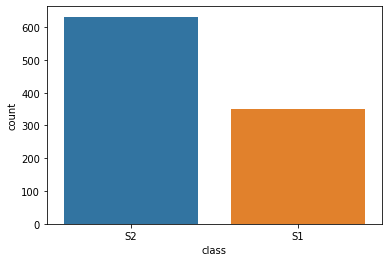

In [16]:
#Q2.1
graph = sns.countplot(x = 'class', data = abt)

the data is slightly imballanced with only with just over a third of the data being classified as s1. There are 2 ways to fix this. one way to fix this is to randomly undersample the data based on S2 so that they are closer to even. The the other way to fix this is to randomly over sample S1 so that it is closer even. 

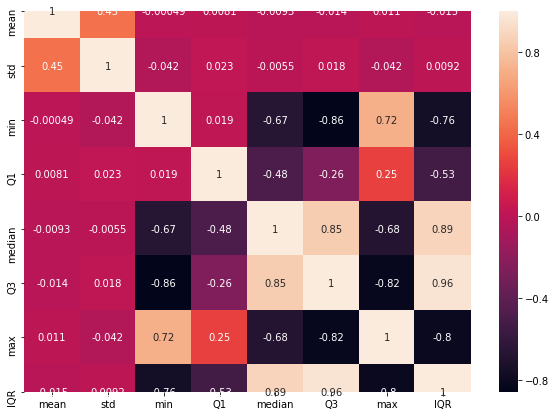

In [17]:
#Q2.2
new_df = abt.drop('class', axis = 1)
plt.subplots(figsize = (10,7))
graph2 = sns.heatmap(new_df.corr(), annot = True, fmt = '.2g')


The the descriptive features with the highest correlation are IQR  Q3. The descriptive features with the highest correlation are min and Q3 as well as max and Q3 along with max and IQR.

In [18]:
abt.head()

mean  std       min        Q1    median        Q3       max  \
ins0  3.225531e-10  1.0 -1.039440 -0.847324 -0.079959  0.181530  3.118721   
ins1  9.021287e-11  1.0 -1.347345 -0.824117 -0.098085  0.152777  3.232569   
ins2  8.476597e-10  1.0 -1.039964 -0.821069 -0.089460  0.176569  3.181970   
ins3  1.140000e-09  1.0 -1.115950 -0.827143 -0.131828  0.141495  3.193192   
ins4 -1.282553e-09  1.0 -1.102342 -0.819913  0.041268  0.251878  3.023882   

           IQR class  
ins0  1.028854    S2  
ins1  0.976895    S2  
ins2  0.997638    S1  
ins3  0.968638    S2  
ins4  1.071791    S2

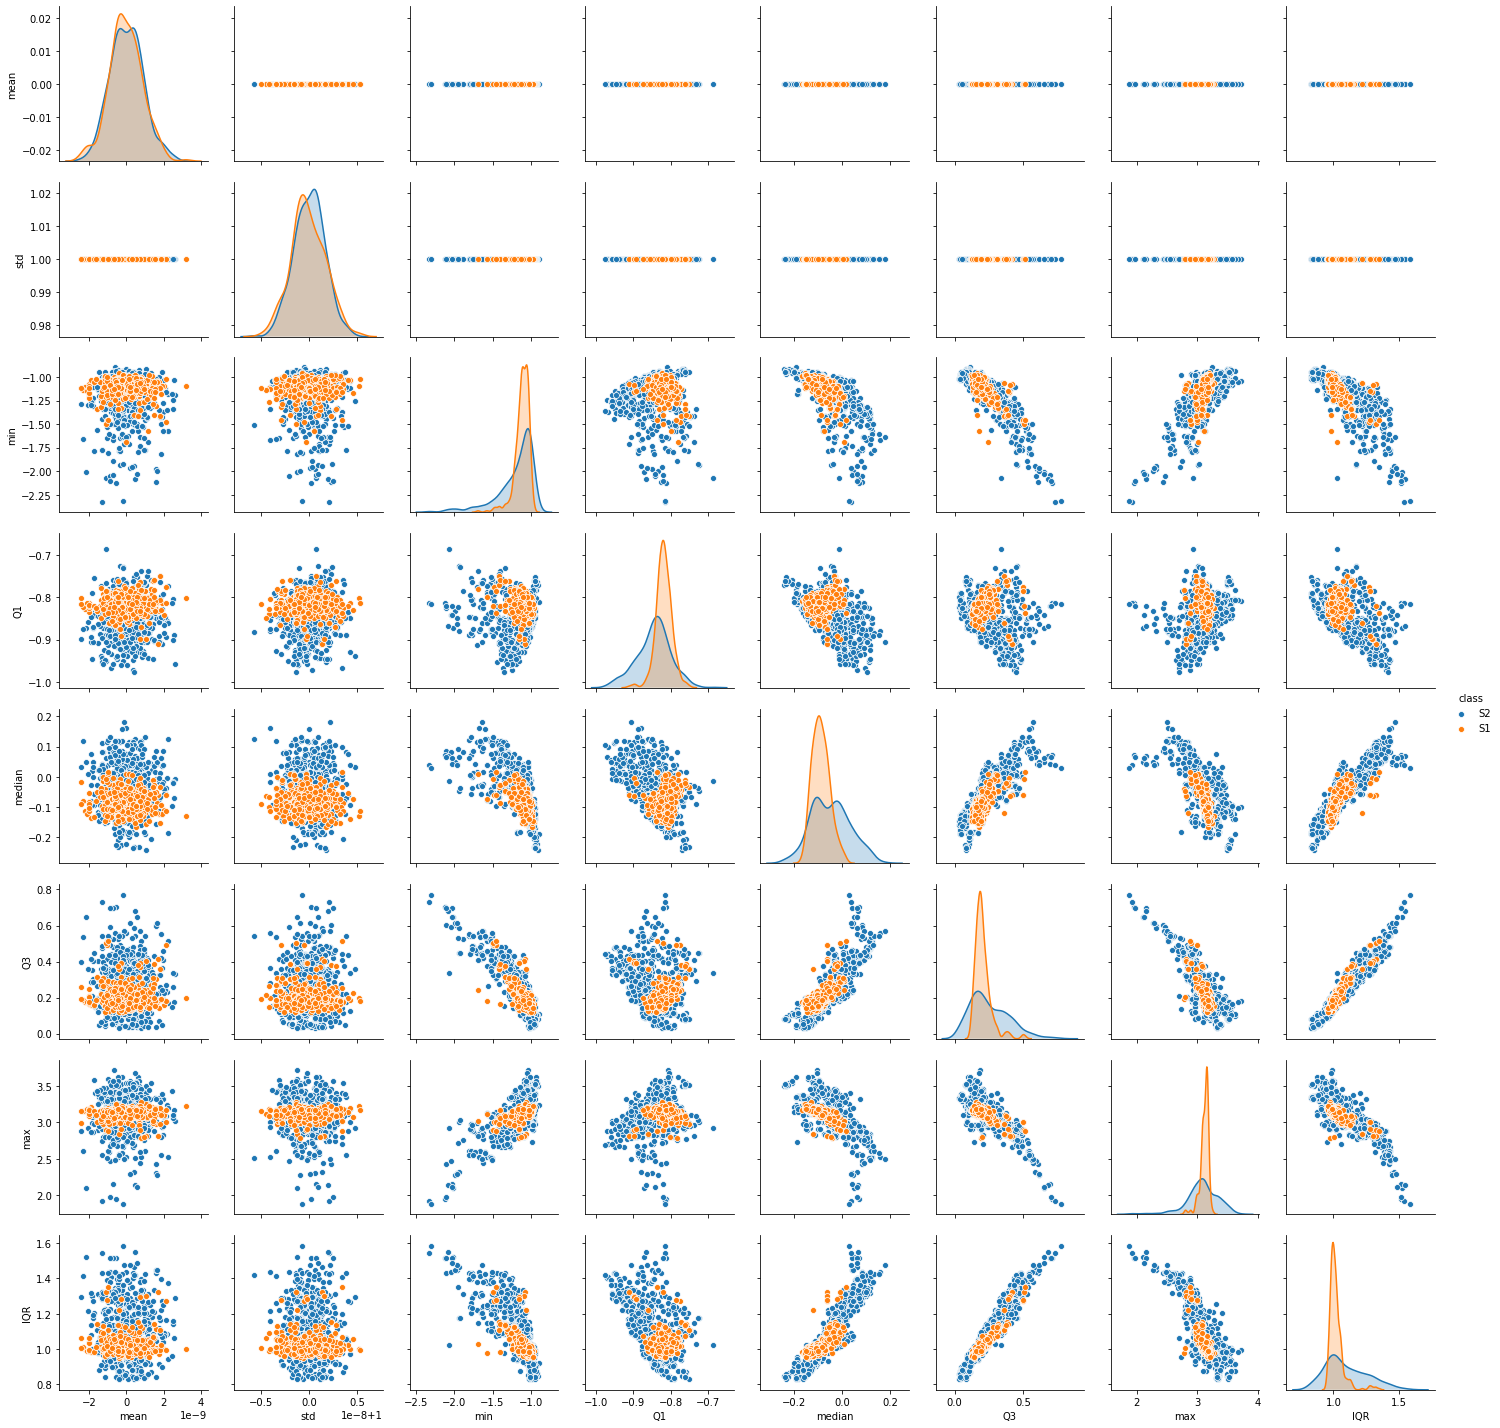

In [19]:
#Q2.3
sns.pairplot(abt, hue = "class")

From the scatter plot matrix I can see that mean and std are less likely to help in determinin the target feature, because when they are plotted they don't exibit a general  trend based on the the target feature. It is just clustering with no visible trend based on the target variable.

## Question 3 (20+5 points)

Using the dataset (`abt`) you created in **Question 1**, create a logistic regression model. Your target feature is `class`, while your descriptive features are `['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR']`. (Hint: the model's class is imported in the preamble as 

`from sklearn.linear_model import LogisticRegression` 

and you can use the default model [without any input parameters]. Use 50% holdout sampling for evaluating this model.  (**8 pts**)

After you train your logistic regression model, test the performance of your model using your test set. 
When evaluating the model, you are expected to report the confusion matrix (**3 pts**), overall classification error [misclassification rate] (**3 pts**), the precision of the class `S1` (**3 pts**) and the recall of the class `S2` (**3 pts**). 

**Bonus Question** Output the classification accuracy and F1-score. Compare the similarities and differences between these two measures. Explain the reasons behind these similarities or differences. (**5 pts**)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# your answer goes here

In [21]:
# your answer to bonus question goes here

## Question 4 (35+5 points)

In this part, you are expected to create a set of random forest models to understand the impact of the estimator count (i.e., number of weak learners) in these ensemble models. You will again be using the dataset (`abt`) created in **Question 1**. Similar to **Question 3**, the target feature is `class`, and you are expected to use all the descriptive features, i.e., `['mean', 'std', 'min', 'Q1', 'median', 'Q3', 'max', 'IQR']`. 

More specifically, the task here is to build random forest classifiers (`RandomForestClassifier` in scikit-learn) under six different parametric settings where number of estimators ($n$) is set to a number from `[1, 10, 50, 100, 500, 1000]`. This means that for every $n$ in the list, you need to repeat the experiment. Feel free to use the `cv_scores` given in the preamble.

Each experiment will use an 8-fold cross validation evaluation schema. For each value of the $n$ parameter, report the mean and the standard deviation of classification accuracies. (Hint: `RandomForestClassifier` uses the parameter `n_estimators` for setting the number of estimators to be built.) (**35 points**)

**Bonus Question** Demonstrate the distributions of classification accuracies for different $n$'s using a box plot. Which $n$ would you pick to train your deployment model as the number of estimators based on the box plots? (**5 pts**)

In [22]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

cv_scores = pd.DataFrame(index=['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8'], 
                      columns=[1, 10, 50, 100, 500, 1000]) # columns represent number of estimators

# your answer goes here

In [23]:
# answer to bonus question goes here